In [1]:
import omdb
import os
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.stats import linregress

In [2]:
# Read CSV
df = pd.read_csv('All_Movies_Working.csv',encoding='latin-1')
df = df.dropna()

In [3]:
# Replace the "min" label from runtime list
runtime = df["Runtime"] 
runtime_int = [mn.replace(' min', '') for mn in runtime]

# Update Runtime column to remove "min" label
df["Runtime"] = runtime_int

# Convert to int type
df["Runtime"] = df["Runtime"].astype(int)

In [4]:
df

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year
0,Beowulf,59.0,PG-13,115,16 Nov 2007,"Animation, Action, Adventure, Fantasy",82200000.0,6.2,"155,920",Internet Movie Database,6.2,Rotten Tomatoes,7.1,Metacritic,5.9,11,2007
1,But I'm a Cheerleader,39.0,R,85,11 Aug 2000,"Comedy, Drama, Romance",175182.0,6.6,"23,614",Internet Movie Database,6.6,Rotten Tomatoes,3.9,Metacritic,3.9,8,2000
2,Flawless,57.0,PG-13,108,28 Mar 2008,"Crime, Drama, Thriller",1146525.0,6.8,"21,901",Internet Movie Database,6.8,Rotten Tomatoes,5.5,Metacritic,5.7,3,2008
3,Gloria,83.0,R,110,09 May 2013,"Comedy, Drama, Romance",1587655.0,6.8,"7,804",Internet Movie Database,6.8,Rotten Tomatoes,9.9,Metacritic,8.3,5,2013
4,Life,54.0,R,104,24 Mar 2017,"Horror, Sci-Fi, Thriller",30180466.0,6.6,"185,922",Internet Movie Database,6.6,Rotten Tomatoes,6.8,Metacritic,5.4,3,2017
5,102 Dalmatians,35.0,G,100,22 Nov 2000,"Adventure, Comedy, Family",65406212.0,4.9,"32,329",Internet Movie Database,4.9,Rotten Tomatoes,3.1,Metacritic,3.5,11,2000
6,The 6th Day,49.0,PG-13,123,17 Nov 2000,"Action, Mystery, Sci-Fi, Thriller",33813823.0,5.9,"111,461",Internet Movie Database,5.9,Rotten Tomatoes,4.1,Metacritic,4.9,11,2000
7,All the Pretty Horses,55.0,PG-13,116,25 Dec 2000,"Drama, Romance, Western",14713716.0,5.8,"12,479",Internet Movie Database,5.8,Rotten Tomatoes,3.2,Metacritic,5.5,12,2000
8,Almost Famous,90.0,R,122,22 Sep 2000,"Adventure, Comedy, Drama, Music",31716715.0,7.9,"237,103",Internet Movie Database,7.9,Rotten Tomatoes,8.9,Metacritic,9.0,9,2000
9,The Art of War,30.0,R,117,25 Aug 2000,"Action, Adventure, Crime, Thriller",29458928.0,5.7,"27,552",Internet Movie Database,5.7,Rotten Tomatoes,1.6,Metacritic,3.0,8,2000


In [5]:
# Strip down dataframe for relevant data
runtime_df = df[["Runtime", "Box Office", "release_year","imdb_rating"]]

# Convert box office numbers to per million
runtime_df["Box Office"] = runtime_df["Box Office"]/1000000

runtime_df

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Runtime,Box Office,release_year,imdb_rating
0,115,82.200000,2007,6.2
1,85,0.175182,2000,6.6
2,108,1.146525,2008,6.8
3,110,1.587655,2013,6.8
4,104,30.180466,2017,6.6
5,100,65.406212,2000,4.9
6,123,33.813823,2000,5.9
7,116,14.713716,2000,5.8
8,122,31.716715,2000,7.9
9,117,29.458928,2000,5.7


In [6]:
# Group runtime and box office numbers by release year
df_groupyear = runtime_df.groupby(['release_year'])["Runtime","Box Office"].mean()
df_groupyear = df_groupyear.reset_index()

In [7]:
df_groupyear

,release_year,Runtime,Box Office
0,2000,106.816667,48.600725
1,2001,106.975806,44.239493
2,2002,104.307692,52.620820
3,2003,106.466216,51.123605
4,2004,105.873418,50.123510
5,2005,105.682081,42.225702
6,2006,106.792553,44.952852
7,2007,106.813830,44.951129
8,2008,103.906077,48.476088
9,2009,104.880682,55.753906


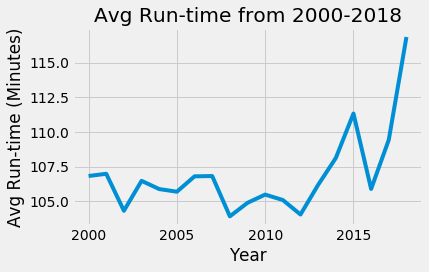

In [26]:
# Chart runtime over time


plt.plot(df_groupyear["release_year"],df_groupyear["Runtime"],label='Runtime')
plt.style.use('fivethirtyeight')
plt.xticks(np.arange(2000, 2020, step=5))
plt.title('Avg Run-time from 2000-2018')
plt.xlabel('Year')
plt.ylabel('Avg Run-time (Minutes)')
plt.tight_layout()

plt.savefig('runtime_images/AvgRuntime.png')
plt.show()

The average runtime is increasing in the past decade.

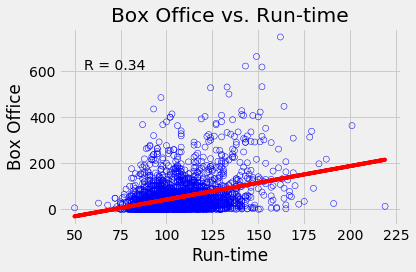

In [27]:
# Review relationship between runtime and box office

x_values = runtime_df["Runtime"]
y_values = runtime_df["Box Office"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values,edgecolors="blue",facecolors="none",alpha=1)
plt.style.use('fivethirtyeight')
plt.title('Box Office vs. Run-time')
plt.xlabel("Run-time")
plt.ylabel("Box Office")
rvalue = round(rvalue,2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(f"R = {rvalue}",(55,605))
plt.tight_layout()

plt.savefig("runtime_images/Runtime_Boxoffice_Corr.png")
plt.show()

There is a light positive correlation between a film's runtime and box office success.

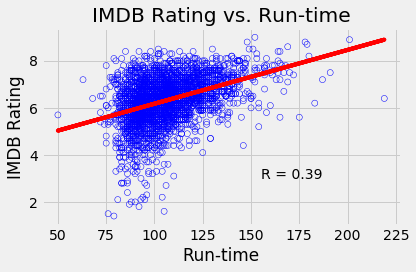

In [28]:
# Review relationship between runtime and IMDB rating

x_values = runtime_df["Runtime"]
y_values = runtime_df["imdb_rating"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values,edgecolors="blue",facecolors="none",alpha=1)
plt.style.use('fivethirtyeight')
plt.title('IMDB Rating vs. Run-time')
plt.xlabel("Run-time")
plt.ylabel("IMDB Rating")
plt.plot(x_values,regress_values,"r-")
rvalue = round(rvalue,2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(f"R = {rvalue}",(155,3))
plt.tight_layout()

plt.savefig('runtime_images/Runtime_IMDBRating_Corr.png')
plt.show()

There is a light positive correlation between a film's runtime and the audience ratings.